In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import sent_tokenize

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
import os
os.chdir('/gdrive/My Drive/NLP-Project/resume_classification')

In [5]:
ls -l

total 55812
-rw------- 1 root root   877372 Nov 30 21:15 resume_classification.ipynb
-rw------- 1 root root 56273235 Aug  8  2021 Resume.csv


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.cm as cm
#%matplotlib inline

# ***Data EXploration***

---



In [8]:
df = pd.read_csv("Resume.csv")

In [ ]:
df

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR
...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION


In [ ]:
len(df['Category'].unique())

24

In [ ]:
df['Category'].value_counts()

INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64

In [ ]:
df.shape

(2484, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [ ]:
df.describe()

,ID
count,2.484000e+03
mean,3.182616e+07
std,2.145735e+07
min,3.547447e+06
25%,1.754430e+07
50%,2.521031e+07
75%,3.611444e+07
max,9.980612e+07


In [9]:
# drop not using columns
df.drop(columns = ['ID', 'Resume_html'], inplace = True)
df

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR
...,...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION
2481,GEEK SQUAD AGENT Professional...,AVIATION
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...,AVIATION


In [10]:
counts = df['Category'].value_counts()
counts

INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64

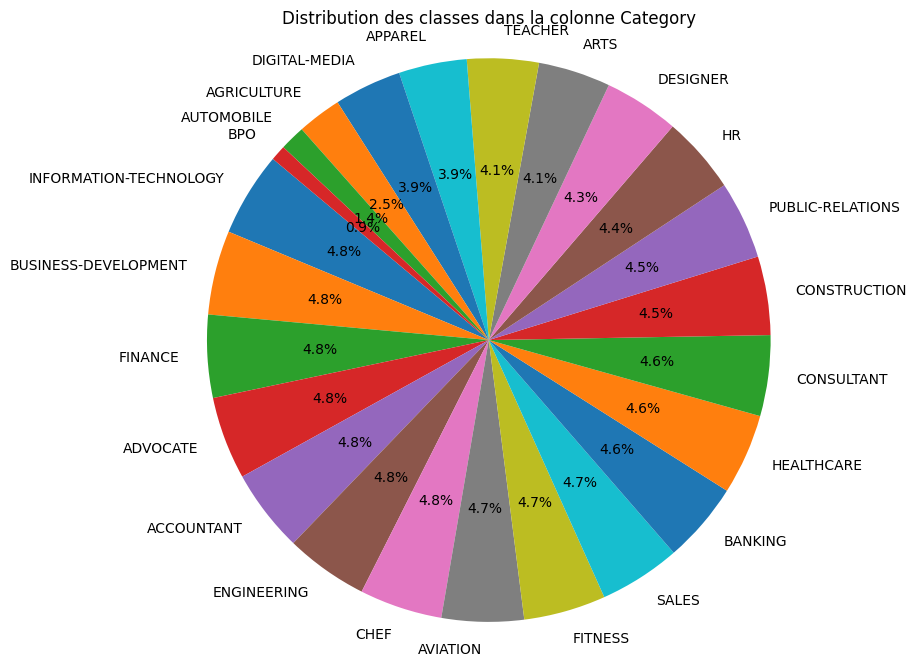

In [ ]:
column_name = "Category"
# Créer un diagramme circulaire (pie chart) pour représenter les classes
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f"Distribution des classes dans la colonne {column_name}")
plt.axis('equal')  # Pour que le pie chart soit un cercle et non une ellipse

# Afficher le diagramme circulaire
plt.show()

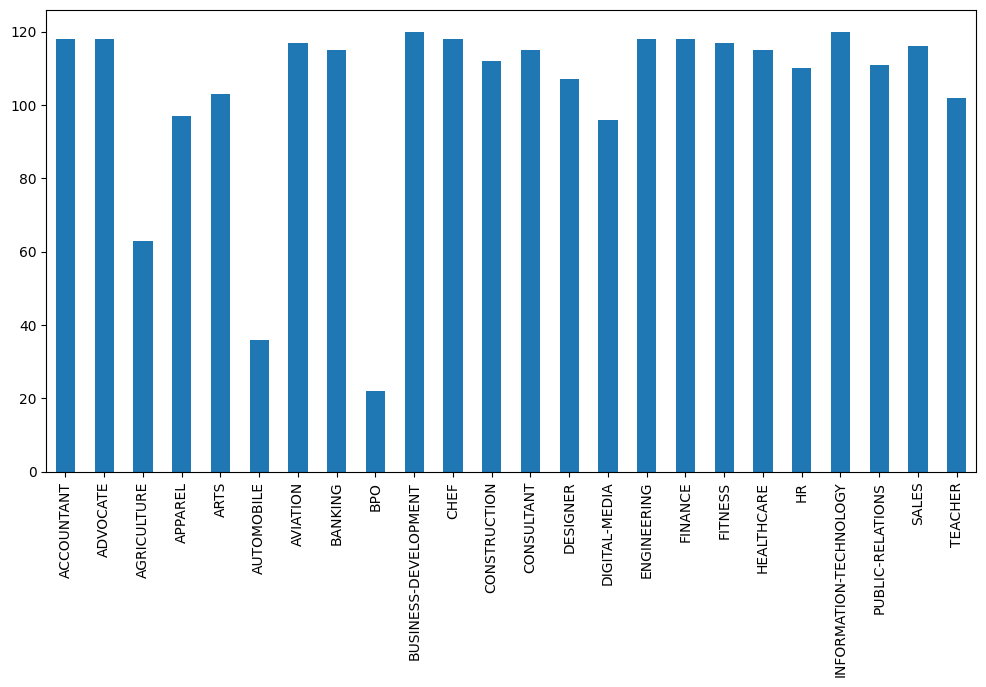

In [ ]:
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [ ]:
selected_classes = counts.head(19).index
selected_classes

Index(['INFORMATION-TECHNOLOGY', 'BUSINESS-DEVELOPMENT', 'FINANCE', 'ADVOCATE',
       'ACCOUNTANT', 'ENGINEERING', 'CHEF', 'AVIATION', 'FITNESS', 'SALES',
       'BANKING', 'HEALTHCARE', 'CONSULTANT', 'CONSTRUCTION',
       'PUBLIC-RELATIONS', 'HR', 'DESIGNER', 'ARTS', 'TEACHER'],
      dtype='object')

In [ ]:
df = df[df["Category"].isin(selected_classes)]
df

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR
...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION


In [ ]:
counts = df['Category'].value_counts()
counts

INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
CONSULTANT                115
HEALTHCARE                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
Name: Category, dtype: int64

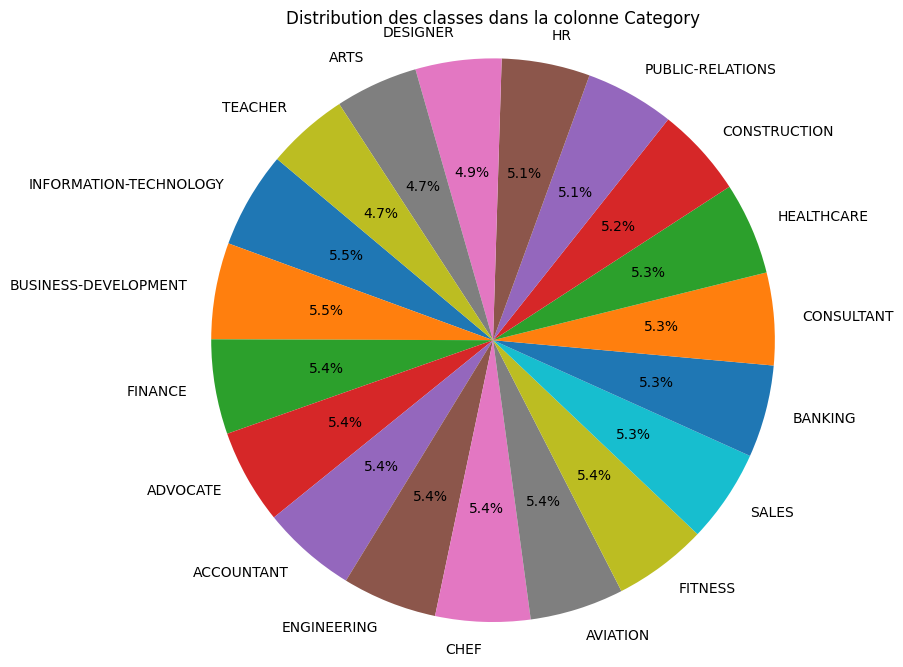

In [ ]:
counts = df['Category'].value_counts()
column_name = "Category"
# Créer un diagramme circulaire (pie chart) pour représenter les classes
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f"Distribution des classes dans la colonne {column_name}")
plt.axis('equal')  # Pour que le pie chart soit un cercle et non une ellipse

# Afficher le diagramme circulaire
plt.show()

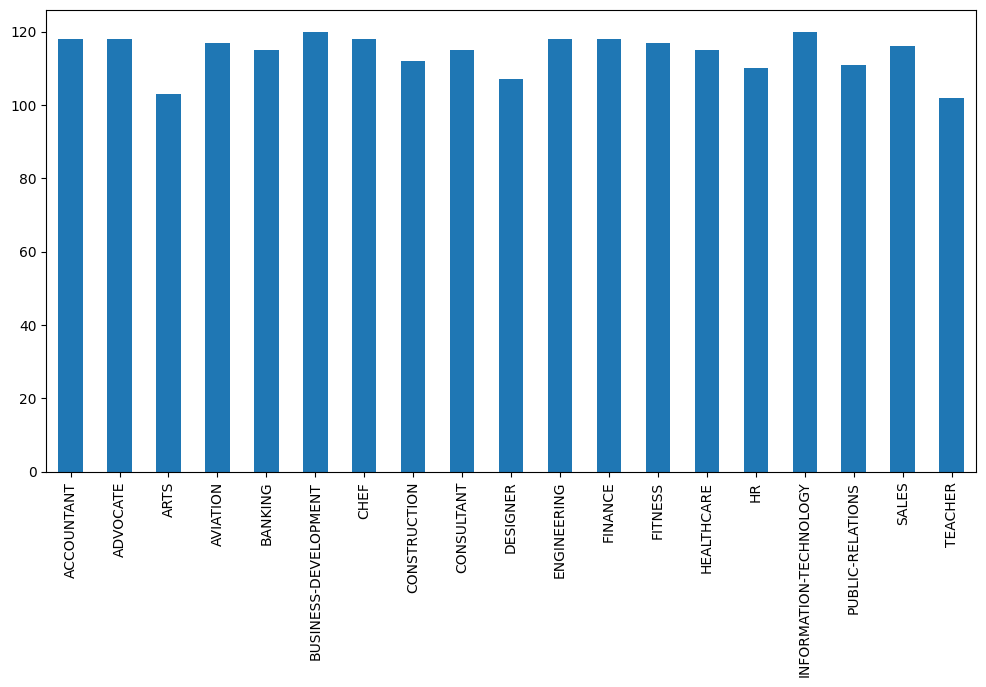

In [ ]:
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

# ***Data PreProcessing***

---



In [11]:
import gensim
from gensim.parsing.preprocessing import STOPWORDS
from gensim.utils import simple_preprocess
def preprocess(text):
    import re
    text = re.sub('[^a-zA-Z]',' ',str(text)).lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.lower() not in stopwords.words('english')
          and word not in STOPWORDS and len(word)>3]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    filtered_words = [lemmatizer.lemmatize(word) for word in tokens]
    text_cleaned = ' '.join(filtered_words)
    return text_cleaned

In [12]:
df['Resume'] = df['Resume_str'].apply(preprocess)

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
STOPWORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [17]:
# create list of all categories
categories = np.sort(df['Category'].unique())
categories
# create new df for corpus and category
df_categories = [df[df['Category'] == category].loc[:, ['Resume', 'Category']] for category in categories]
df_categories[1]

,Resume,Category
439,advocate professional summary conscientious at...,ADVOCATE
440,advocate summary depth knowledge taking order ...,ADVOCATE
441,advocate summary seeking time generalist posit...,ADVOCATE
442,donor advocate professional summary organized ...,ADVOCATE
443,health advocate professional summary empowered...,ADVOCATE
...,...,...
552,organizer capacity building strategist experie...,ADVOCATE
553,multimedia sale consultant professional summar...,ADVOCATE
554,driver summary passionate dedicated profession...,ADVOCATE
555,district manager summary seeking setting expan...,ADVOCATE


In [20]:
# word frequency for each category
def wordfreq(df):
    count = df['Resume'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

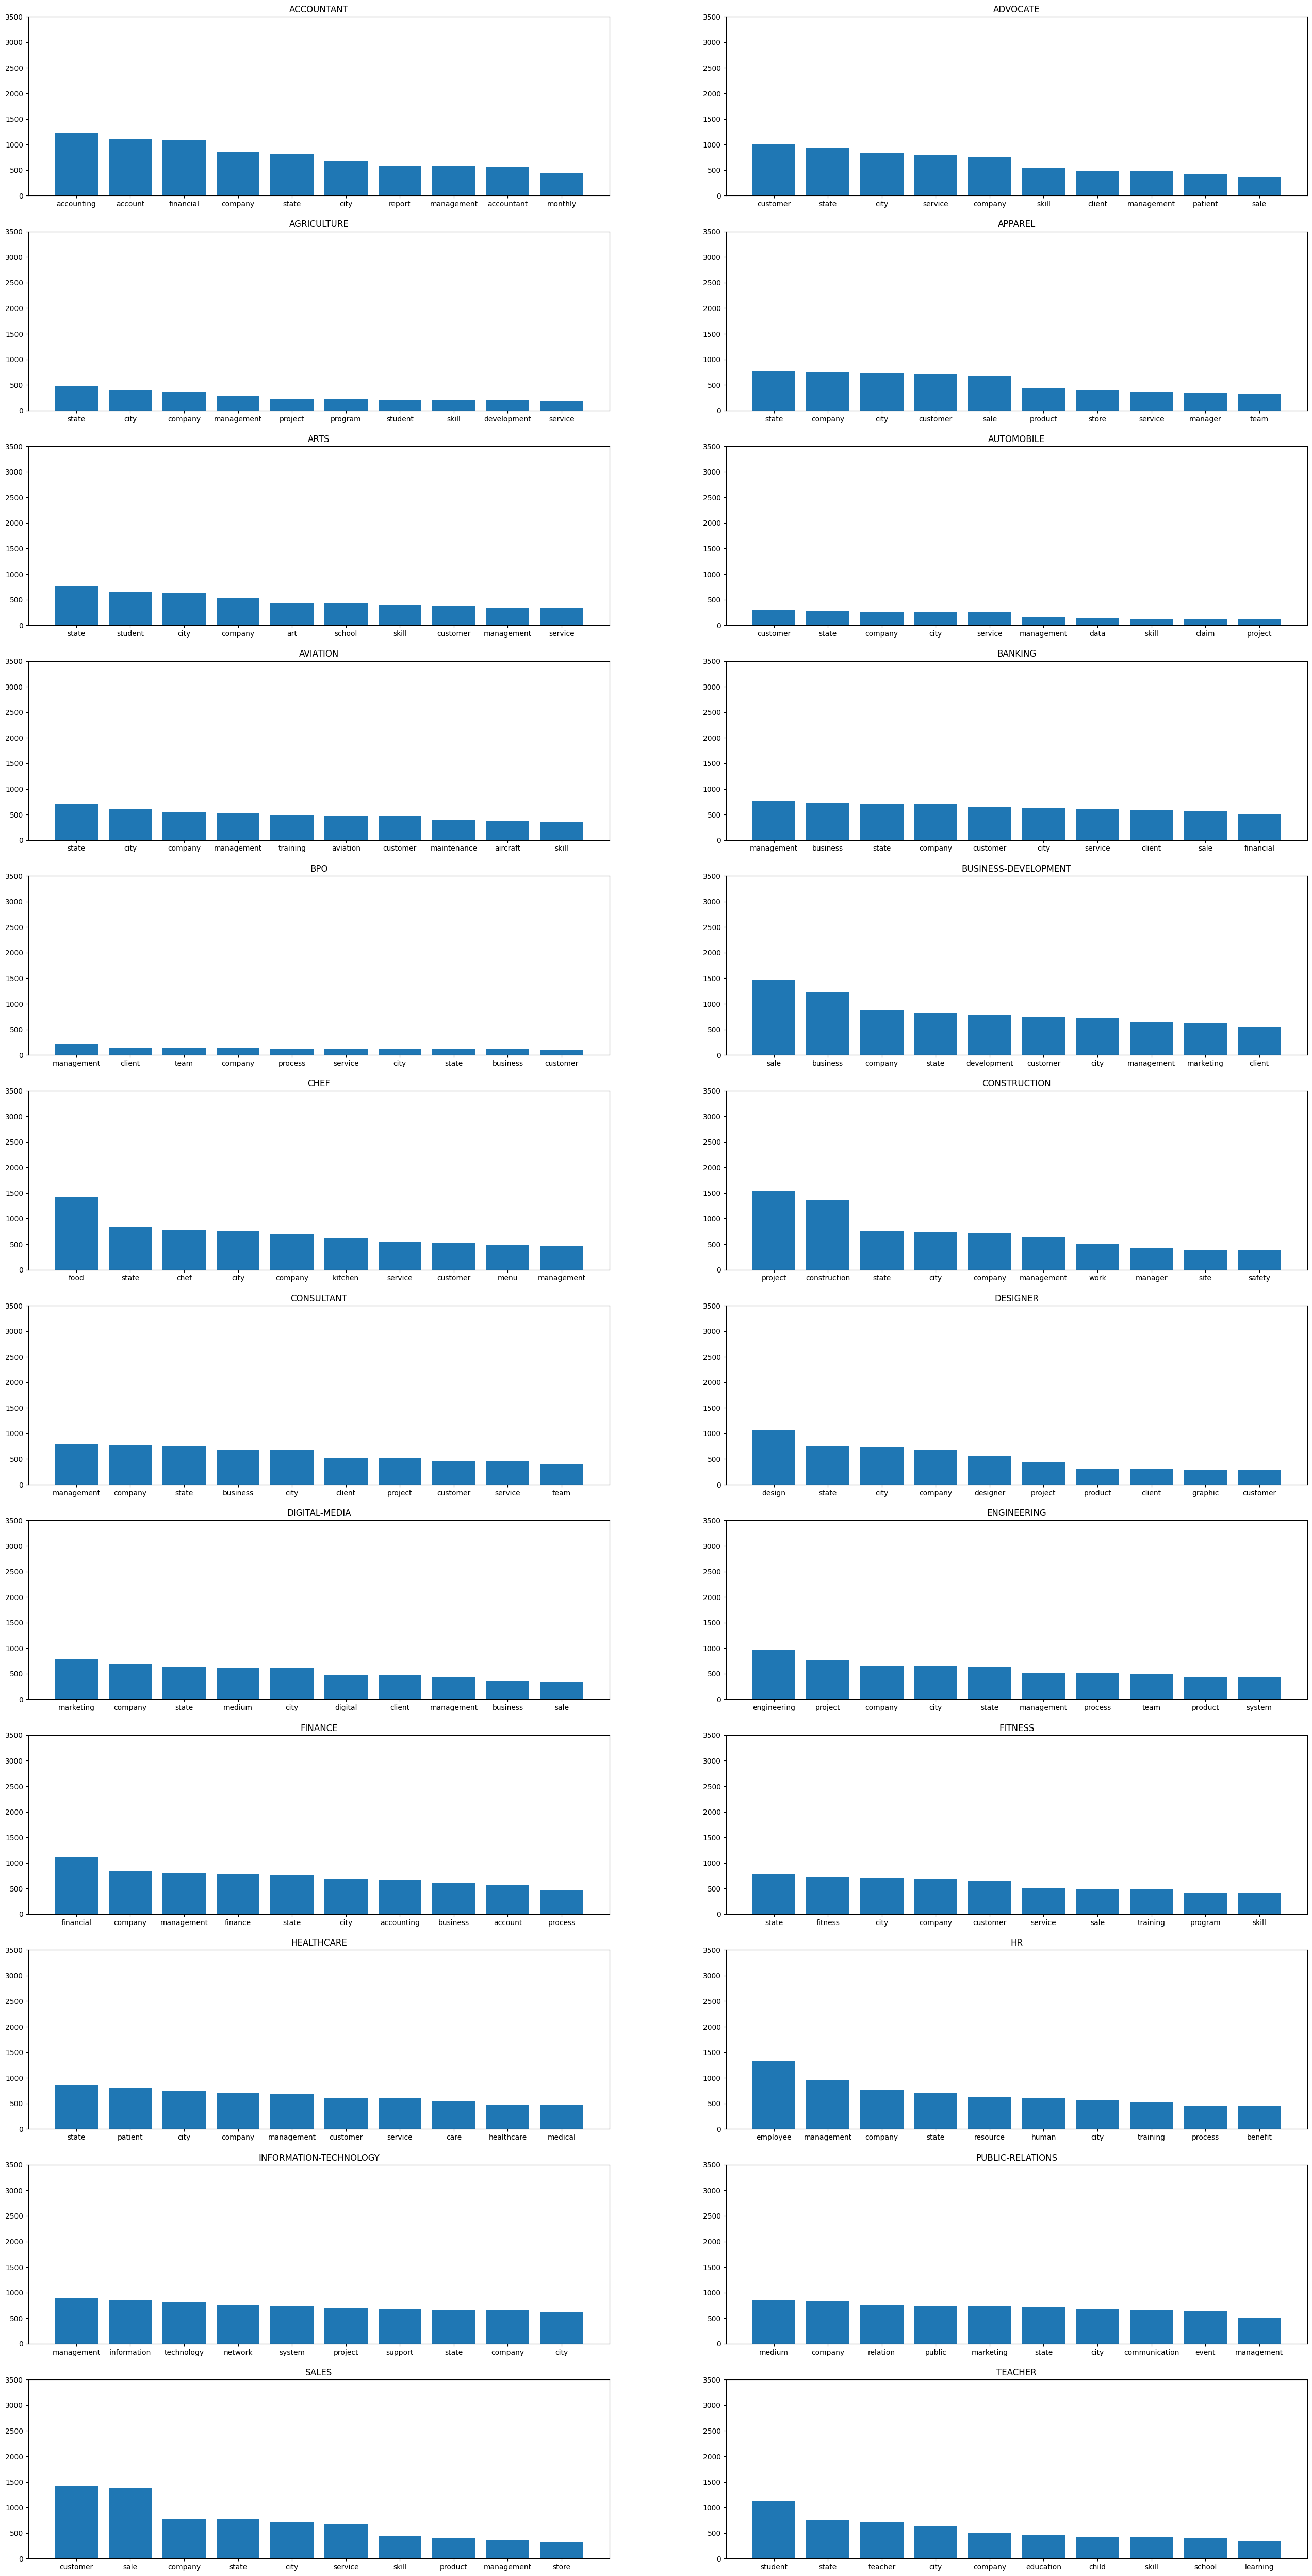

In [21]:
fig = plt.figure(figsize=(32, 64))

for i, category in enumerate(np.sort(df['Category'].unique())):
    wf = wordfreq(df_categories[i])

    fig.add_subplot(12, 2, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 3500)

plt.show()
plt.close()

In [ ]:
df

,ID,Resume_str,Resume_html,Category,Resume
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,administrator marketing associate administrato...
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,specialist operation summary versatile medium ...
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,director summary year experience recruiting pl...
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,specialist summary dedicated driven dynamic ye...
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,manager skill highlight skill department start...
...,...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,rank commissioned officer charge brigade mail ...
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION,government relation communication organization...
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,geek squad agent professional profile support ...
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,program director office manager summary highly...


In [24]:
from wordcloud import WordCloud
def wordcloud(df):
    txt = ' '.join(txt for txt in df['Resume'])
    wordcloud = WordCloud(
        height=2000,
        width=4000
    ).generate(txt)

    return wordcloud

In [25]:
plt.figure(figsize=(32, 20))

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

Output hidden; open in https://colab.research.google.com to view.

In [26]:
# try to remove extra word which are note important.
def remove_extra_word(text):

    extra_word=['company',  'city', 'state'] # extra words
    words = text.split()  # Split the text into words

    # Filter out the extra words
    filter_word = [word for word in words if word not in extra_word]

    filter_text = ' '.join(filter_word)

    return filter_text

# apply resume_data['Cleaned_Resume']

df['Resume'] = df['Resume'].apply(lambda x:remove_extra_word(x))

In [27]:
# create list of all categories
categories = np.sort(df['Category'].unique())
categories
# create new df for corpus and category
df_categories = [df[df['Category'] == category].loc[:, ['Resume', 'Category']] for category in categories]
df_categories[1]

,Resume,Category
439,advocate professional summary conscientious at...,ADVOCATE
440,advocate summary depth knowledge taking order ...,ADVOCATE
441,advocate summary seeking time generalist posit...,ADVOCATE
442,donor advocate professional summary organized ...,ADVOCATE
443,health advocate professional summary empowered...,ADVOCATE
...,...,...
552,organizer capacity building strategist experie...,ADVOCATE
553,multimedia sale consultant professional summar...,ADVOCATE
554,driver summary passionate dedicated profession...,ADVOCATE
555,district manager summary seeking setting expan...,ADVOCATE


In [ ]:
plt.figure(figsize=(32, 20))

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
"""
from nltk.util import ngrams
# Vous pouvez modifier n pour des trigrammes ou d'autres valeurs
df['ngrams'] = df['Resume'].apply(lambda x: list(ngrams(x, 2)))
all_bigrams = df['ngrams'].explode().value_counts()
all_bigrams
# Convertir les bigrammes en texte
df['ngrams_text'] = df['ngrams'].apply(lambda x: ' '.join([' '.join(gram) for gram in x]))
df
"""

"\nfrom nltk.util import ngrams\n# Vous pouvez modifier n pour des trigrammes ou d'autres valeurs\ndf['ngrams'] = df['Resume'].apply(lambda x: list(ngrams(x, 2)))\nall_bigrams = df['ngrams'].explode().value_counts()\nall_bigrams\n# Convertir les bigrammes en texte\ndf['ngrams_text'] = df['ngrams'].apply(lambda x: ' '.join([' '.join(gram) for gram in x]))\ndf\n"

In [28]:
from sklearn.preprocessing import LabelEncoder
# Convert categories to numerical labels using LabelEncoder
label_encoder = LabelEncoder()
df["Category"] = label_encoder.fit_transform(df["Category"])


In [29]:
# Create a dictionary mapping category names to encoded labels
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
category_mapping

{'ACCOUNTANT': 0,
 'ADVOCATE': 1,
 'AGRICULTURE': 2,
 'APPAREL': 3,
 'ARTS': 4,
 'AUTOMOBILE': 5,
 'AVIATION': 6,
 'BANKING': 7,
 'BPO': 8,
 'BUSINESS-DEVELOPMENT': 9,
 'CHEF': 10,
 'CONSTRUCTION': 11,
 'CONSULTANT': 12,
 'DESIGNER': 13,
 'DIGITAL-MEDIA': 14,
 'ENGINEERING': 15,
 'FINANCE': 16,
 'FITNESS': 17,
 'HEALTHCARE': 18,
 'HR': 19,
 'INFORMATION-TECHNOLOGY': 20,
 'PUBLIC-RELATIONS': 21,
 'SALES': 22,
 'TEACHER': 23}

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df['Resume'], df['Category'], test_size = 0.3)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
# Créer un vecteur TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(2, 2))
X_train_vectorizer = vectorizer.fit_transform(X_train).astype(float)
X_test_vectorizer = vectorizer.transform(X_test).astype(float)

# ***Random Forest Classifier***

In [ ]:
# using grid search for find optimal values for RF classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

RFC = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(estimator=RFC, param_grid=param_grid, cv= 5, scoring='accuracy', return_train_score=False, verbose=1)
grid_search = grid.fit(X_train_vectorizer, Y_train)

print(grid_search.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}


In [ ]:
# Perform cross-validation
from sklearn.model_selection import cross_val_score
RF_Model = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')
num_folds = 5  # Number of folds for cross-validation
cv_scores = cross_val_score(RF_Model, X_train_vectorizer, Y_train, cv=num_folds)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

In [ ]:
cv_scores

array([0.67763158, 0.64802632, 0.67434211, 0.64802632, 0.65676568])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_Model.fit(X_train_vectorizer, Y_train)
prediction = RF_Model.predict(X_test_vectorizer)
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


array([15, 18, 15,  6, 13, 17, 11, 12,  6, 12, 10, 13,  5, 17,  9,  6,  0,
       17, 18, 16, 16,  0, 10,  9, 11, 15, 18, 12,  1,  0, 14, 13, 16, 10,
       17,  0, 12, 15, 15,  5, 18, 11,  6, 10,  5, 15,  7, 14, 12, 16, 15,
        5,  5,  5, 10, 15, 12,  0, 17, 18,  9, 12, 10,  0, 11, 11, 10,  0,
        5,  6, 15,  4, 14,  5,  6, 12,  0,  5, 17, 10, 17, 15, 10, 17, 17,
       11, 12,  0, 17,  2, 15, 14, 13,  7,  7, 10,  5,  6, 17, 11, 15, 17,
       14, 12,  5, 14, 13,  5, 14, 18,  8,  5, 12,  5,  5, 18, 15, 14, 18,
       15,  0,  5,  5,  8, 13, 17, 12, 10, 13,  6, 14,  5, 14, 12, 11,  0,
       13,  5, 12, 15,  0, 10,  0, 12, 12, 14, 12,  9, 16, 14,  7, 18,  6,
       11, 11,  6, 17,  0,  0, 15, 18, 15, 12, 15, 11,  8, 15, 12, 12, 15,
        3,  7, 15,  0, 13, 17,  7,  5, 12,  6, 15,  3, 13,  8, 13, 17,  4,
       14,  5, 15, 15, 16,  0, 11, 12, 15,  5, 17,  8, 14,  6,  6, 17,  0,
        6,  0,  8, 10,  3,  6, 12,  6,  0, 15, 12,  9,  5,  7, 13,  1, 14,
       11,  5, 18,  0, 12

In [ ]:
RF_Model.score(X_test_vectorizer, Y_test)

0.6620583717357911

In [ ]:
print("training Score: {:.2f}".format(RF_Model.score(X_train_vectorizer, Y_train)))
print("test Score: {:.2f}".format(RF_Model.score(X_test_vectorizer, Y_test)))

training Score: 0.90
test Score: 0.66


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Evaluate model performance
accuracy = accuracy_score(Y_test, prediction)
accuracy

0.6620583717357911

In [ ]:
# Prédiction des probabilités pour les ensembles de test
y_score_rf = RF_Model.predict_proba(X_test_vectorizer)[:, 1]

In [ ]:
from sklearn import metrics
print("model report: %s: \n %s\n" % (RF_Model, metrics.classification_report(Y_test, prediction)))

model report: RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=500,
                       random_state=42): 
               precision    recall  f1-score   support

           0       0.58      1.00      0.74        38
           1       1.00      0.28      0.44        46
           2       0.60      0.11      0.18        28
           3       0.81      0.37      0.51        35
           4       0.73      0.24      0.36        33
           5       0.64      0.93      0.76        40
           6       0.68      0.70      0.69        30
           7       0.78      0.66      0.71        32
           8       0.86      0.53      0.66        36
           9       1.00      0.77      0.87        31
          10       0.67      0.78      0.72        37
          11       0.68      0.58      0.62        33
          12       0.32      0.81      0.46        27
          13       0.62      0.37      0.46        35
          14       0.73      0.90      0.81        40
   

# ***SVM classifier with a non-linear (RBF) kernel***

In [ ]:
# using grid search for find optimal values for RF classifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


svm_classifier = SVC(kernel='rbf')

param_grid = {
    'C': [0.1, 1, 10],            # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
}


grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_vectorizer, Y_train)

# Retrieve the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the SVM model with the best parameters
best_svm_classifier = SVC(kernel='rbf', **best_params,probability=True)

# Perform cross-validation
num_folds = 5  # Number of folds for cross-validation
cv_scores = cross_val_score(best_svm_classifier, X_train_vectorizer, Y_train, cv=num_folds)

print(" best params is ",best_params )
print(" best score  is ",best_score )

 best params is  {'C': 10, 'gamma': 0.1}
 best score  is  0.6346339239187077


In [ ]:
best_svm_classifier.fit(X_train_vectorizer, Y_train)

# Make predictions on the test set
predictions = best_svm_classifier.predict(X_test_vectorizer)
print(" prediction is  ",predictions)

 prediction is   [15  2 15  6 13 17 11  3  6  8 10 13  5  3  9  6 11 17 17 16 16  0 10  9
 11 15  1 13 18  0 13 13 16 10 16  0 17 15 15  5 18 11  6 10  5 15  7 14
  3  2  8  5 13  5 10 13 12  0 13 18  9  1  8 11 11  4 10 11  8  6 15  4
 13  5  6  8 11  5 17 10 17 15 10 17 17 11 16  0  6  2 15 14 13  7  7  3
  8  6 17 11 15 17 14 12  5 14 13 15 14 18 10  5  1  5  5 17 15 14 13 15
  0  5  5  8 13 17  1 10 13  6 14  5 14  4 11  0 13  5 17 15  0 10  0  3
 12 14 12  9 16 14  3  2  6 11 11  2 17  0  0  8 18 15 12 15 17  8 15 13
 12 15  3  3 15  0 13 17  7 17  3  6 15  3 13  8 13 17  4 14 12  8 15 16
  0 11  2 15  5 12  8 14  6  6 17  0  1  0  8 10  3  6 13  6  0  8  9  7
  5  7 13  1 14  0  5 18  0 12 15 14 14  0  9 11 14 15 13 13 15 10 12  4
  7  4 11  7  0  7 18 10 10  8  4 11  3 16  5 18  1 17  6 10 12  3  2 17
  2  4  3 12 15 16 17 17 11  9  1 18 17 15  3  8  4  7  3 11 10  9  0  4
 12  3 17  9 18 15 11 14  5 13 11  0 13 17  6  8 15  7  3  9 18  7 17 16
 14  3 13 10  4  5  8 18 15 14  0 

In [ ]:
accuracy = accuracy_score(Y_test, predictions)
accuracy

0.6651305683563749

In [ ]:
# Prédiction des probabilités pour les ensembles de test
y_score_svm = best_svm_classifier.predict_proba(X_test_vectorizer)[:, 1]

In [ ]:
from sklearn import metrics
print("model report: %s: \n %s\n" % (best_svm_classifier, metrics.classification_report(Y_test, prediction)))

model report: SVC(C=10, gamma=0.1, probability=True): 
               precision    recall  f1-score   support

           0       0.58      1.00      0.74        38
           1       1.00      0.28      0.44        46
           2       0.60      0.11      0.18        28
           3       0.81      0.37      0.51        35
           4       0.73      0.24      0.36        33
           5       0.64      0.93      0.76        40
           6       0.68      0.70      0.69        30
           7       0.78      0.66      0.71        32
           8       0.86      0.53      0.66        36
           9       1.00      0.77      0.87        31
          10       0.67      0.78      0.72        37
          11       0.68      0.58      0.62        33
          12       0.32      0.81      0.46        27
          13       0.62      0.37      0.46        35
          14       0.73      0.90      0.81        40
          15       0.60      0.92      0.73        38
          16       0.79  

# **ANN Model**

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import to_categorical

In [ ]:
# Convert sparse matrices to dense arrays
tfidf_train_arrays = X_train_vectorizer.toarray()
tfidf_valid_arrays = X_test_vectorizer.toarray()

# Build a simple neural network model
num_classes = 19

y_train_label = to_categorical(Y_train, num_classes=num_classes)
y_valid_label = to_categorical(Y_test, num_classes=num_classes)
# Build a more complex neural network model
model = Sequential()
model.add(Dense(1000, input_dim=tfidf_train_arrays.shape[1]))
model.add(Dense(500, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Use softmax for multi-class classification

# Compile the model with a lower learning rate
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model with more epochs
history = model.fit(tfidf_train_arrays, y_train_label, epochs=50, batch_size=32, validation_data=(tfidf_valid_arrays, y_valid_label))

# Evaluate the model on the validation set
loss, accuracy = model.evaluate(tfidf_valid_arrays, y_valid_label)
print(f"Validation loss: {loss:.4f}")
print(f"Validation accuracy: {accuracy:.4f}")

# store info
#model_lis.append("Artificial Neural Network")
#accuracy_lis.append(accuracy_score(y_valid, y_val_pred)*100)